In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 创建一个空的数据列表
data = []

In [2]:
def extract(filename, data=data):
    with open(filename, 'r') as file:
        lines = file.readlines()

    jump_cnt = 0

    # 遍历每一行并解析数据
    i = -1
    while i+1 < len(lines):
        i += 1
        line = lines[i]
        if "============" in line:
            if jump_cnt<2: # 跳过前两个=====
                jump_cnt += 1
                continue
            else: 
                if lines[i+2].split()[0] == 'Finished' or lines[i+1].split()[1] == 'BAD': 
                    i = len(lines)
                    break
                line = lines[i+3]
                parts = line.split()
                data.append(parts)
    return data

In [3]:
import os

directory_path = "../result/4/"  # 将此路径替换为您要搜索的目录的路径
file_names = [file for file in os.listdir(directory_path) if file.endswith(".out")]

for filename in file_names:
    print(filename)
    if 'fail' in filename: continue
    extract(directory_path + filename)


N_12_cut.out
N_4_finish.out
N+_54_finish.out
NB_16_finish.out
NB_19_finish.out
NB_4_cut.out
NB_9_finish.out


In [4]:
# 创建一个 Pandas DataFrame
df = pd.DataFrame(data, columns=['T/V', 'N', 'NB', 'P', 'Q', 'Time', 'Gflops'])
df

,T/V,N,NB,P,Q,Time,Gflops
0,WR00R2L2,40704,192,2,2,143.75,3.1277e+02
1,WR00R2L2,45696,192,2,2,200.89,3.1666e+02
2,WR00R2L2,49920,192,2,2,279.16,2.9710e+02
3,WR00R2L2,54144,192,2,2,349.04,3.0318e+02
4,WR00R2L2,57600,192,2,2,389.93,3.2674e+02
...,...,...,...,...,...,...,...
113,WR00R2L2,89088,368,2,2,1806.92,2.6088e+02
114,WR00R2L2,89088,376,2,2,1808.94,2.6059e+02
115,WR00R2L2,89088,384,2,2,2199.85,2.1428e+02
116,WR00R2L2,89088,392,2,2,2174.01,2.1683e+02


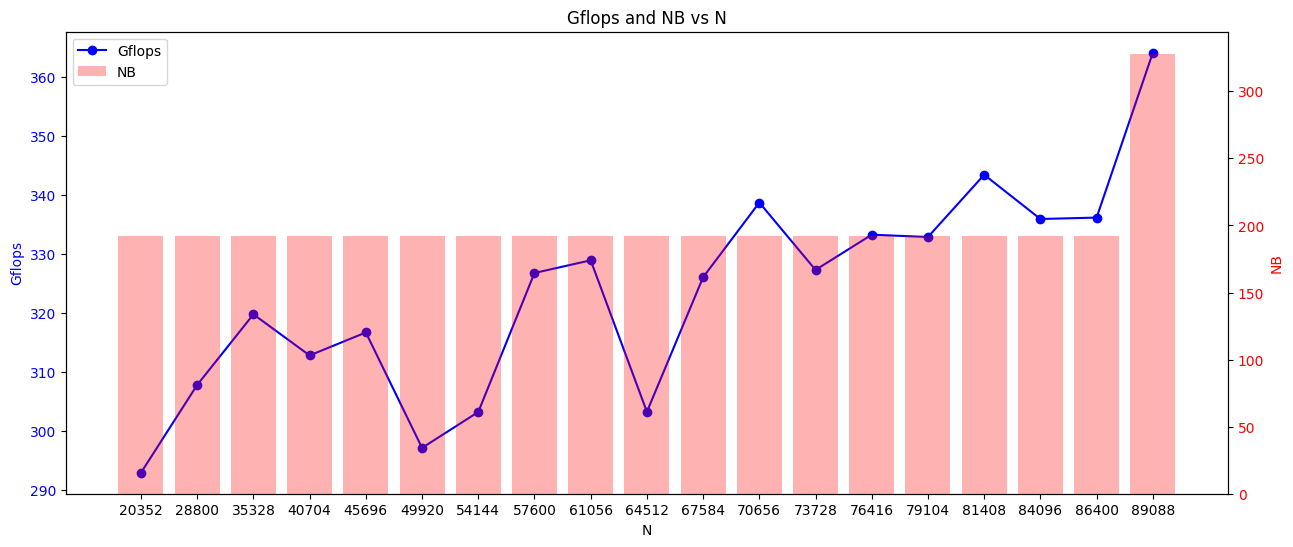

In [8]:
# 4核，Gflops随N变化图
max_gflops_indices = df.groupby("N")["Gflops"].idxmax()
max_gflops_data = df.loc[max_gflops_indices]
max_gflops_data['Gflops'] = max_gflops_data['Gflops'].apply(lambda x: float(x))
max_gflops_data['NB'] = max_gflops_data['NB'].apply(lambda x: float(x))

N = max_gflops_data['N']
NB = max_gflops_data['NB']
Gflops = max_gflops_data['Gflops']

fig, ax1 = plt.subplots(figsize=(15, 6))

# 绘制折线图
ax1.plot(N, Gflops, label='Gflops', marker='o', linestyle='-', color='b')
ax1.set_xlabel('N')
ax1.set_ylabel('Gflops', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# 创建第二个y坐标轴
ax2 = ax1.twinx()
ax2.bar(N, NB, label='NB', color='r', alpha=0.3)
ax2.set_ylabel('NB', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# 添加图例
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# 添加标题
plt.title('Gflops and NB vs N')

# 显示图表
plt.show()

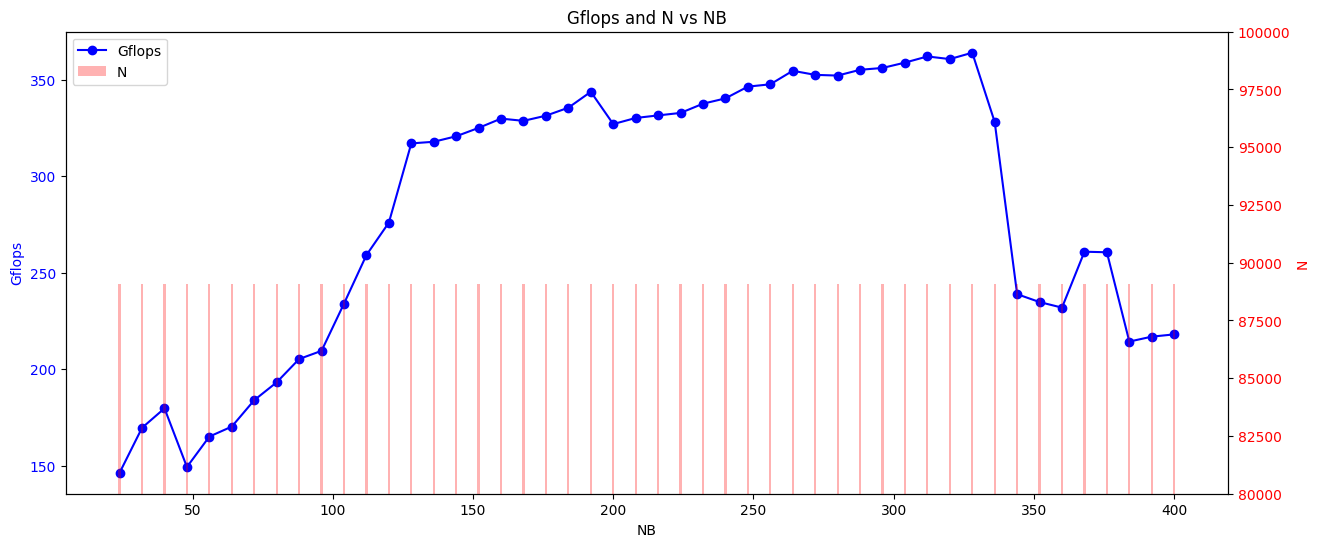

In [13]:
# 4核，Gflops随NB变化
max_nb_indices = df.groupby("NB")["Gflops"].idxmax()
max_nb_data = df.loc[max_nb_indices]
max_nb_data['Gflops'] = max_nb_data['Gflops'].apply(lambda x: float(x))
max_nb_data['NB'] = max_nb_data['NB'].apply(lambda x: float(x))
max_nb_data['N'] = max_nb_data['N'].apply(lambda x: float(x))
max_nb_data.sort_values(by='NB', inplace=True)

# 提取NB和Gflops列
NB = max_nb_data['NB']
Gflops = max_nb_data['Gflops']
N = max_nb_data['N']

fig, ax1 = plt.subplots(figsize=(15, 6))

# 绘制折线图
ax1.plot(NB, Gflops, label='Gflops', marker='o', linestyle='-', color='b')
ax1.set_xlabel('NB')
ax1.set_ylabel('Gflops', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# 创建第二个y坐标轴
ax2 = ax1.twinx()
ax2.bar(NB, N, label='N', color='r', alpha=0.3)
ax2.set_ylabel('N', color='r')
ax2.tick_params(axis='y', labelcolor='r')
ax2.set_ylim(80000, 100000)  # 指定y2轴的刻度范围

# 添加图例
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# 添加标题
plt.title('Gflops and N vs NB')

# 显示图表
plt.show()

In [4]:
import os
directory_path = "../result/24/"  # 将此路径替换为您要搜索的目录的路径
file_names = [file for file in os.listdir(directory_path) if file.endswith(".out")]
data_24 = []

for filename in file_names:
    print(filename)
    if 'fail' in filename: continue
    extract(directory_path + filename, data_24)

df_24 = pd.DataFrame(data_24, columns=['T/V', 'N', 'NB', 'P', 'Q', 'Time', 'Gflops'])
df_24

N&NB_51_cut.out
N&NB_PQ_74_cut.out
PQ_38_cut.out
other_9_finish.out
PQ+_20_cut.out
NB_10_finish.out
NB_16_finish.out


,T/V,N,NB,P,Q,Time,Gflops
0,WR00R2L2,20352,312,4,6,7.08,7.9434e+02
1,WR00R2L2,20352,320,4,6,7.07,7.9491e+02
2,WR00R2L2,20352,328,4,6,6.55,8.5864e+02
3,WR00R2L2,28800,312,4,6,15.97,9.9725e+02
4,WR00R2L2,28800,320,4,6,16.26,9.7946e+02
...,...,...,...,...,...,...,...
213,WR00R2R2,79104,272,4,6,251.91,1.3100e+03
214,WR00R2R2,79104,280,4,6,250.38,1.3180e+03
215,WR00R2R2,79104,288,4,6,250.27,1.3186e+03
216,WR00R2R2,79104,296,4,6,249.47,1.3228e+03


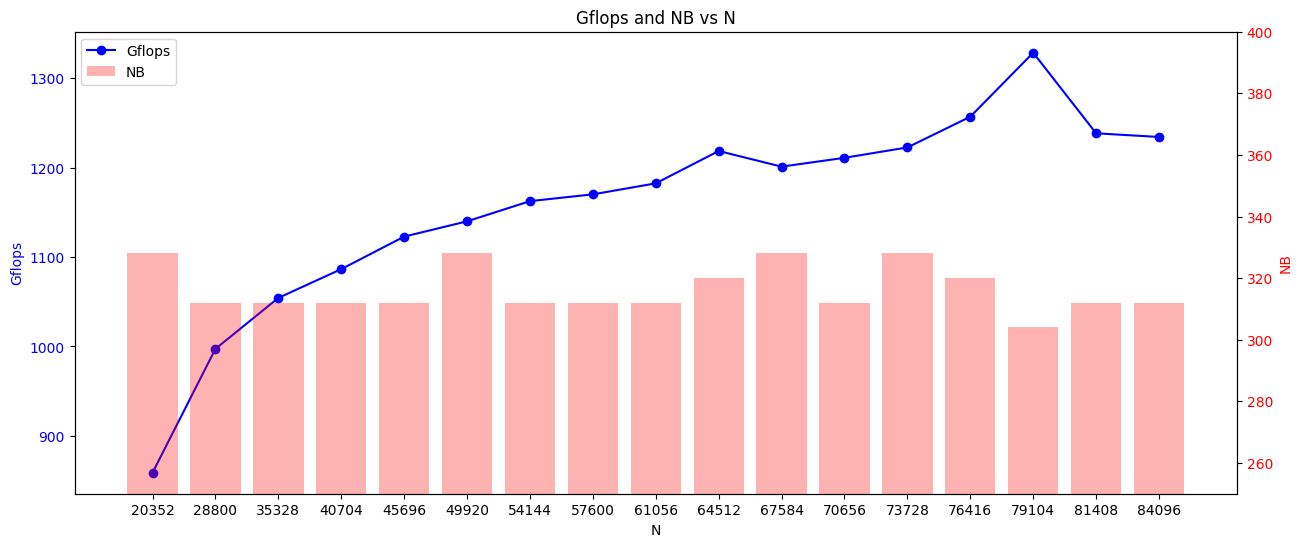

In [5]:
# 24核，Gflops随N变化图
df_24['Gflops'] = df_24['Gflops'].apply(lambda x: float(x))
df_24['NB'] = df_24['NB'].apply(lambda x: float(x))
max_gflops_indices = df_24.groupby("N")["Gflops"].idxmax()
max_gflops_data = df_24.loc[max_gflops_indices]

N = max_gflops_data['N']
NB = max_gflops_data['NB']
Gflops = max_gflops_data['Gflops']

fig, ax1 = plt.subplots(figsize=(15, 6))

# 绘制折线图
ax1.plot(N, Gflops, label='Gflops', marker='o', linestyle='-', color='b')
ax1.set_xlabel('N')
ax1.set_ylabel('Gflops', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# 创建第二个y坐标轴
ax2 = ax1.twinx()
ax2.bar(N, NB, label='NB', color='r', alpha=0.3)
ax2.set_ylabel('NB', color='r')
ax2.tick_params(axis='y', labelcolor='r')
ax2.set_ylim(250, 400)  # 指定y2轴的刻度范围

# 添加图例
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# 添加标题
plt.title('Gflops and NB vs N')

# 显示图表
plt.show()

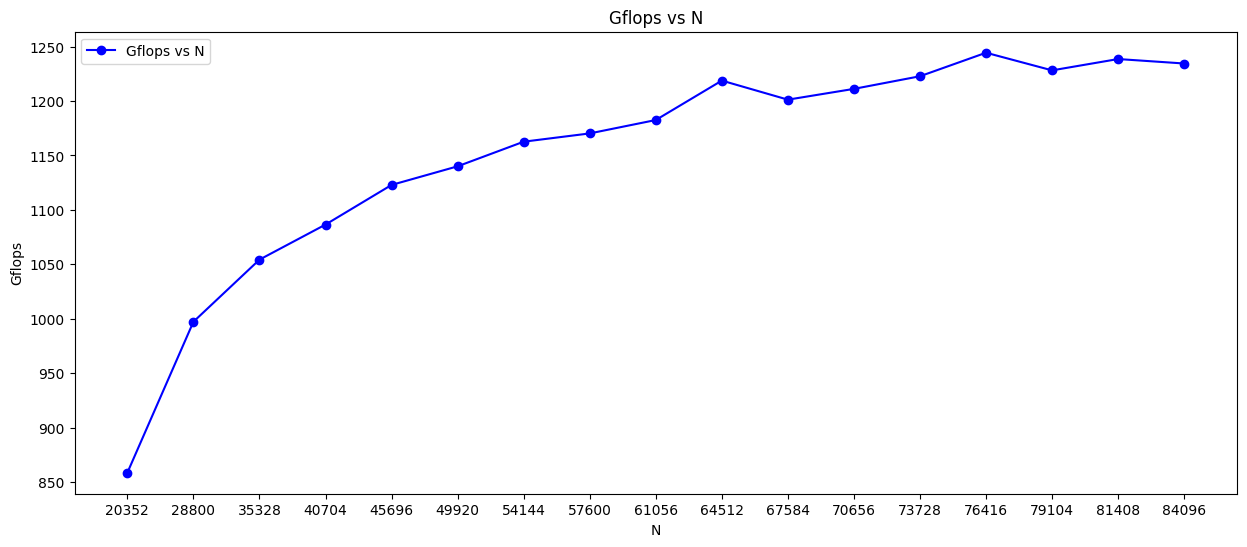

In [8]:
# 24核用N画一个图(刚开始画的，忘了用哪组数据了，但还挺好看的)
max_gflops_data['Gflops'] = max_gflops_data['Gflops'].apply(lambda x: float(x))

# 提取N和Gflops列
N = max_gflops_data['N']
Gflops = max_gflops_data['Gflops']

# 创建折线图
plt.figure(figsize=(15, 6))  # 设置图形大小
plt.plot(N, Gflops, marker='o', linestyle='-', color='b', label='Gflops vs N')  # 绘制折线图
plt.xlabel('N')  # 设置x轴标签
plt.ylabel('Gflops')  # 设置y轴标签
plt.title('Gflops vs N')  # 设置图标题
plt.legend()  # 显示图例
plt.show()  # 显示图形

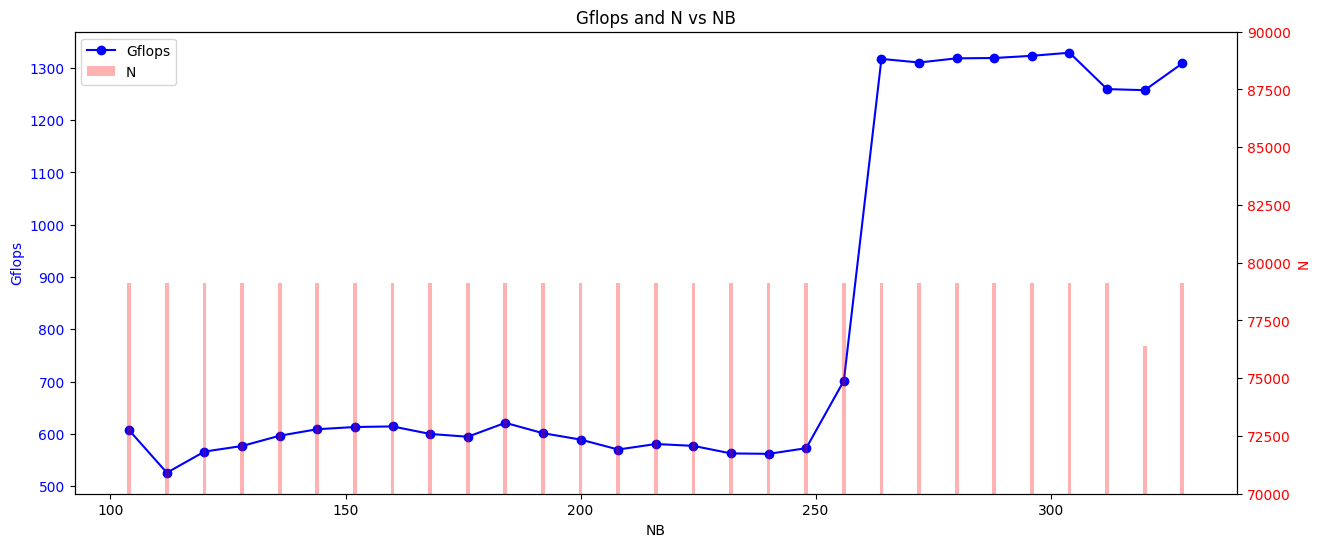

In [7]:
# 24核，Gflops随NB变化
df_24['Gflops'] = df_24['Gflops'].apply(lambda x: float(x))
df_24['NB'] = df_24['NB'].apply(lambda x: float(x))
df_24['N'] = df_24['N'].apply(lambda x: float(x))
max_nb_indices = df_24.groupby("NB")["Gflops"].idxmax()
max_nb_data = df_24.loc[max_nb_indices]
max_nb_data.sort_values(by='NB', inplace=True)

# 提取NB和Gflops列
NB = max_nb_data['NB']
Gflops = max_nb_data['Gflops']
N = max_nb_data['N']

fig, ax1 = plt.subplots(figsize=(15, 6))

# 绘制折线图
ax1.plot(NB, Gflops, label='Gflops', marker='o', linestyle='-', color='b')
ax1.set_xlabel('NB')
ax1.set_ylabel('Gflops', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# 创建第二个y坐标轴
ax2 = ax1.twinx()
ax2.bar(NB, N, label='N', color='r', alpha=0.3)
ax2.set_ylabel('N', color='r')
ax2.tick_params(axis='y', labelcolor='r')
ax2.set_ylim(70000, 90000)  # 指定y2轴的刻度范围

# 添加图例
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# 添加标题
plt.title('Gflops and N vs NB')

# 显示图表
plt.show()

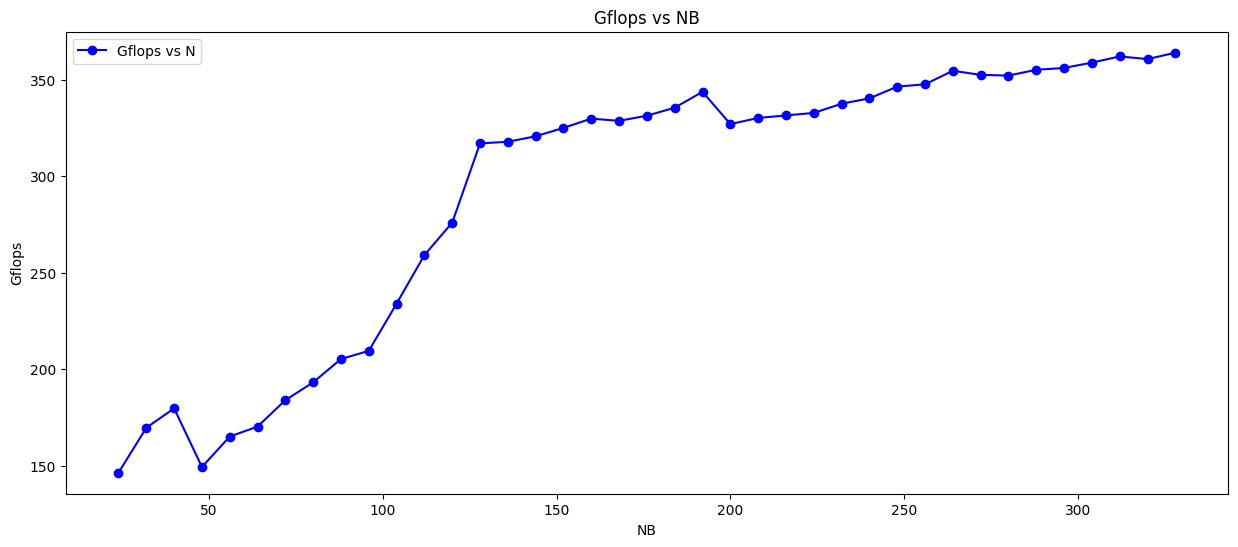

In [10]:
# 用NB画一个图
max_nb_indices = df.groupby("NB")["Gflops"].idxmax()
max_nb_data = df.loc[max_nb_indices]
max_nb_data['Gflops'] = max_nb_data['Gflops'].apply(lambda x: float(x))
max_nb_data['NB'] = max_nb_data['NB'].apply(lambda x: float(x))
max_nb_data.sort_values(by='NB', inplace=True)

# 提取NB和Gflops列
NB = max_nb_data['NB']
Gflops = max_nb_data['Gflops']

# 创建折线图
plt.figure(figsize=(15, 6))  # 设置图形大小
plt.plot(NB, Gflops, marker='o', linestyle='-', color='b', label='Gflops vs N')  # 绘制折线图
plt.xlabel('NB')  # 设置x轴标签
plt.ylabel('Gflops')  # 设置y轴标签
plt.title('Gflops vs NB')  # 设置图标题
plt.legend()  # 显示图例
plt.show()  # 显示图形

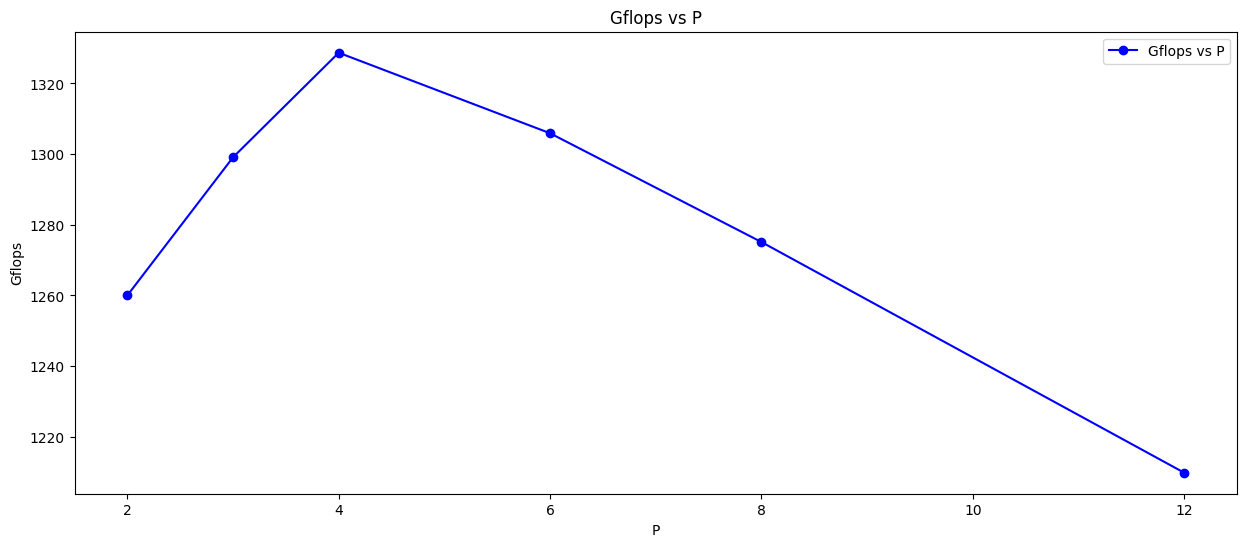

In [9]:
# 24核，P和Q画一个图
df_24['Gflops'] = df_24['Gflops'].apply(lambda x: float(x))
df_24['P'] = df_24['P'].apply(lambda x: float(x))
max_p_indices = df_24.groupby("P")["Gflops"].idxmax()
max_p_data = df_24.loc[max_p_indices]
max_p_data.sort_values(by='P', inplace=True)

# 提取NB和Gflops列
P = max_p_data['P']
Gflops = max_p_data['Gflops']
Q = max_p_data['Q']

# 创建折线图
plt.figure(figsize=(15, 6))  # 设置图形大小
plt.plot(P, Gflops, marker='o', linestyle='-', color='b', label='Gflops vs P')  # 绘制折线图
plt.xlabel('P')  # 设置x轴标签
plt.ylabel('Gflops')  # 设置y轴标签
plt.title('Gflops vs P')  # 设置图标题
plt.legend()  # 显示图例
plt.show()  # 显示图形

In [ ]:
# 跨节点画一个图